**Задание**

* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - **sepal_length** и **sepal_width** и целевую переменную - **variety**
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для **тестовой** выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - **sepal_length** и **sepal_width**
* Подберите оптимальное число кластеров для алгоритма **kmeans** и визуализируйте полученную кластеризацию

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

plt.rc('axes', titlesize = 14)
plt.rc('axes', labelsize = 14)
plt.rc('axes', titlepad = 15)

In [154]:
iris = load_iris()
iris.DESCR

# Информация из iris.DESCR:
# The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  
# One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

Из описания к данным следует, что один класс растений линейно отделим от двух других, а последние два **линейно не отделимы** друг от друга. Поэтому нам надо показать, можно ли эти 2 класса разделить на основе классификации и кластеризации.

In [155]:
# iris

In [156]:
# загружаем данные в датафрейм:
df = pd.DataFrame(iris['data'], columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
df.head(3)

# Из названий столбцов видим, что ВСЕ столбцы датафрейма являются НЕкатегориальными 

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [157]:
df.info()
# sepal length - длина чашелистника, см
# sepal width  - ширина чашелистника, см

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [158]:
variety = iris['target'] # целевой признак - класс растений
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [159]:
# имя целевого признака / название трех классов растений:

iris['target_names']
# setosa     - Ирис щетинистый   
# versicolor - Ирис разноцветный 
# virginica  - Ирис виргинский  

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [160]:
# разделяем выборку на тренировочную и тестовую:
# df      - НЕзависимая переменная (т.к. весь датафрейм с НЕкатегориальными столбцами)
# variety - зависимая категориальная переменная -> выбираем ДИСКРИМИНАНТНЫЙ анализ

X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size = 0.3, random_state = 18)
print(f'test:  {len(y_test)}')
print(f'train: {len(y_train)}')

test:  45
train: 105


In [161]:
# Построение модели линейного дискриминантного анализа (ЛДА):
lda = LinearDiscriminantAnalysis()

# обучение данных:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [162]:
# делаем прогноз на тестовой выборке:
predict = lda.predict(X_test)
predict

array([1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 0,
       2])

In [163]:
# посмотрим, будет ли разница между известным фактом (test) и нашим прогнозом (train):
diff = pd.DataFrame([y_test, predict]).T
diff[diff[0] != diff[1]]

# Видим, что во всех случаях наша модель не ошиблась.

,0,1


In [164]:
# расчет точности - отношение верных прогнозов к общему количеству позиций:
accuracy_score(y_test, predict)
# т.е. имеем 100% правильных ответов при прогнозировании

1.0

In [165]:
print('Результаты работы LDA модели:') 
from sklearn.metrics import confusion_matrix

LDA_result = confusion_matrix(y_test, lda.predict(X_test))
LDA_result

Результаты работы LDA модели:


array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 17]])

In [166]:
# [13,10,15] - число верно предсказанных значений. Неверных предсказаний нет!

In [167]:
# центроиды - координаты центров точек в каждом классе для двух признаков
lda.means_[:, [0, 1]]

array([[5.01428571, 3.43142857],
       [5.91891892, 2.78108108],
       [6.59090909, 2.93333333]])

In [168]:
lda.means_[:,0]

array([5.01428571, 5.91891892, 6.59090909])

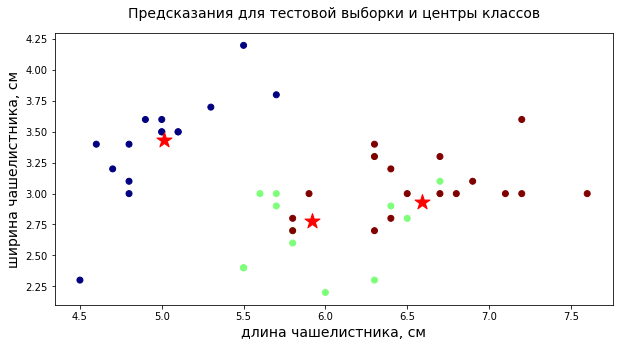

In [169]:
# визуализируем дискриминантную линию для ТЕСТОВОЙ выборки по двум признакам: длина и ширина чашелистника
# визуализируем также центры классов с помощью lda.means_:

plt.figure(figsize = (10, 5))
plt.title('Предсказания для тестовой выборки и центры классов')
plt.scatter(x = X_test['sepal length'], y = X_test['sepal width'], cmap = plt.cm.jet, c = y_test)
plt.scatter(x = lda.means_[:, 0], y = lda.means_[:, 1], color = 'red', marker = '*', s = 250)
plt.xlabel('длина чашелистника, см')
plt.ylabel('ширина чашелистника, см')
plt.show()

# Наша визуализация подтверждает описание к датафрейму, которое гласит, что два из трех классов линейно не отделимы, т.е. пересекаются между собой.
# Поэтому нам нужно провести КЛАСТЕРНЫЙ анализ, чтобы точнее сгруппировать объекты.

In [170]:
df[['sepal length', 'sepal width']].corr()

# коэффициент корреляции по модулю получился НЕбольшим ~ 0.1 (т.е. все точки СИЛЬНО рассеяны вокруг прямой линии), 
# а значит оба этих признака важны для анализа.

# Далее выясним, а какой всё же из этих двух признаков важнее?

,sepal length,sepal width
sepal length,1.00000,-0.11757
sepal width,-0.11757,1.00000


In [171]:
# коэффициенты дискриминатных линий (получается 3 класса растений для нужных нам двух признаков)
lda.coef_[:, [0,1]]

# По значениям этих коэффициентов видим, что для кластеризации второй признак (ширина чашелистника) 
# в несколько раз важнее первого (длина чашелистника) для каждого из 3 классов растений.

array([[ 6.618064  , 11.7273727 ],
       [-1.79282382, -4.28733163],
       [-5.00902298, -7.63111437]])

**Кластерный анализ**

Подберем **оптимальное** число кластеров для алгоритма **kmeans** и визуализируем полученную кластеризацию.

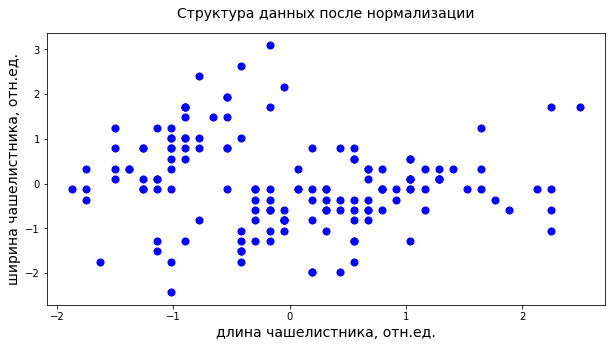

In [182]:
# сперва выполним нормализацию данных (для этого возьмем 2 нужных нам столбца датафрейма):

scaler      = StandardScaler() 
data_scaled = scaler.fit_transform(df[['sepal length', 'sepal width']])

plt.figure(figsize = (10, 5))
plt.scatter(x = data_scaled[:, 0], y = data_scaled[:, 1], c = 'b', s = 50)
plt.title('Структура данных после нормализации')
plt.xlabel('длина чашелистника, отн.ед.')
plt.ylabel('ширина чашелистника, отн.ед.')
plt.show()

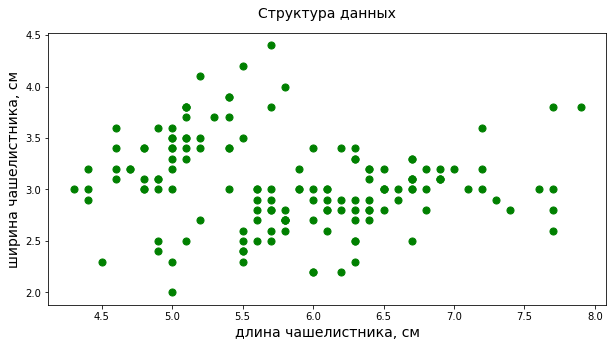

In [183]:
# обратный переход к ненормированным переменным:
data_unscaled = scaler.inverse_transform(data_scaled)

plt.figure(figsize = (10, 5))
plt.scatter(x = data_unscaled[:, 0], y = data_unscaled[:, 1], c = 'g', s = 50)
plt.title('Структура данных')
plt.xlabel('длина чашелистника, см')
plt.ylabel('ширина чашелистника, см')
plt.show()

In [174]:
# Выбор оптимального количества кластеров методом логтя:

k_inertia = []
ks = range(1, 20) # задаем диапазон кластеров
for k in ks:
    kmeans_ = KMeans(n_clusters = k)
    clusters_kmeans = kmeans_.fit_predict(data_scaled)
    k_inertia.append(kmeans_.inertia_) # добавляем инерцию каждой модели в список

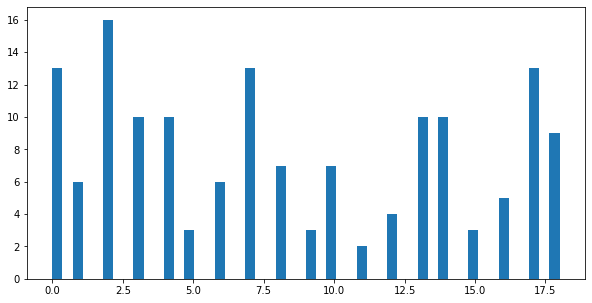

In [175]:
plt.figure(figsize = (10, 5))
plt.hist(clusters_kmeans, bins = 50); plt.show()

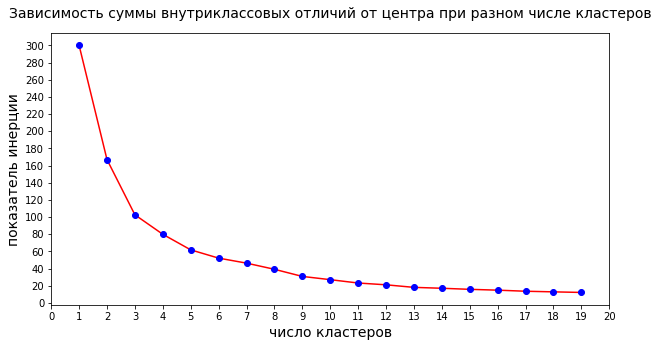

In [176]:
# визуализируем выбор оптимального количества кластеров:

plt.figure(figsize = (10, 5))
plt.plot(ks, k_inertia, 'r')
plt.plot(ks, k_inertia ,'bo')
plt.xticks(range(0,21,1))
plt.yticks(range(0,310,20))
plt.xlabel('число кластеров')
plt.ylabel('показатель инерции')
plt.title('Зависимость суммы внутриклассовых отличий от центра при разном числе кластеров')
plt.show()

Из графика видим, что **оптимально** лучше использовать **3** кластера, т.к. при ks > 3 показатель инерции перестает сильно уменьшаться.

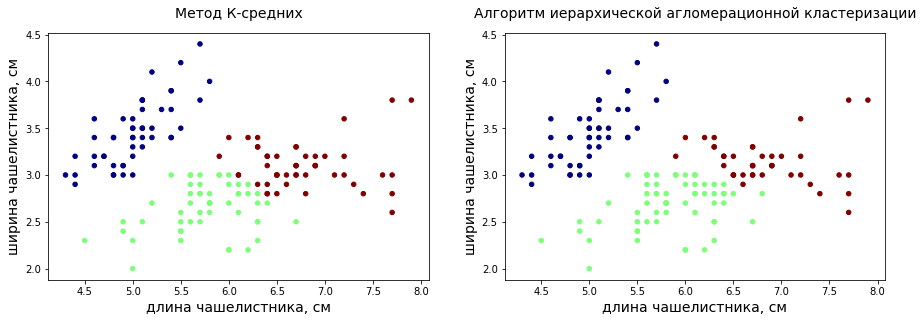

In [177]:
# fit_predict обучается на данных и каждому объекту присваивает кластер
number_clust = 3 # число кластеров

kmeans_      = KMeans(n_clusters = number_clust)
clust_KMeans = kmeans_.fit_predict(data_scaled)

# дополнительно возьмем еще другой алгоритм кластеризации:
aglo         = AgglomerativeClustering(n_clusters = number_clust)
clust_aglo   = aglo.fit_predict(data_scaled)

# визуализируем:
plt.figure(figsize = (15, 10))
plt.subplot(221)
plt.scatter(x = data_unscaled[:, 0], y = data_unscaled[:, 1], c = clust_KMeans, cmap = 'jet', s = 20)
plt.title('Метод К-средних')
plt.xlabel('длина чашелистника, см')
plt.ylabel('ширина чашелистника, см')

plt.subplot(222)
plt.scatter(x = data_unscaled[:, 0], y = data_unscaled[:, 1], c = clust_aglo, cmap = 'jet', s = 20)
plt.title('Алгоритм иерархической агломерационной кластеризации')
plt.xlabel('длина чашелистника, см')
plt.ylabel('ширина чашелистника, см')
plt.show()

# Второй и третий кластеры БЛИЗКО расположены!

Полученные 2 графика кластеризации, можно сказать, в целом совпадают. 

В них наблюдаются различия лишь на границах двух из трех кластеров. Поэтому для этих спорных данных нужно проводить дополнительное исследование.

Попробуем найти **количественное** отличие по принадлежностям данных к кластерам при использовании разных методов кластерного анализа.

In [178]:
# добавим в датафрейм информацию о принадлежности данных кластерам для двух разных методов кластеризации:
df_ = pd.DataFrame(data_scaled, columns = ['norm_length', 'norm_width'])

df_['clust_KMeans'] = clust_KMeans
df_['clust_aglo']   = clust_aglo
df_.head()

,norm_length,norm_width,clust_KMeans,clust_aglo
0,-0.900681,1.019004,0,0
1,-1.143017,-0.131979,0,0
2,-1.385353,0.328414,0,0
3,-1.506521,0.098217,0,0
4,-1.021849,1.249201,0,0


In [179]:
print(df_.clust_KMeans.unique())
print(df_.clust_aglo.unique())

[0 1 2]
[0 1 2]


In [181]:
print(f'Получается, что {len(df_[df_.clust_KMeans != df_.clust_aglo])} из {len(df)} строк датафрейма относятся к РАЗНЫМ кластерам \
при использовании рассмотренных выше двух методов кластерного анализа.')

print(f'\nСоответственно, оставшиеся {len(df) - len(df_[df_.clust_KMeans != df_.clust_aglo])} строк данных методом К-средних и \
алгоритмом иерархической агломерационной кластеризации группируются в одни и те же кластеры.')

Получается, что 8 из 150 строк датафрейма относятся к РАЗНЫМ кластерам при использовании рассмотренных выше двух методов кластерного анализа.

Соответственно, оставшиеся 142 строк данных методом К-средних и алгоритмом иерархической агломерационной кластеризации группируются в одни и те же кластеры.
